# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

sns.set()

# Carga de datos

- Cargar datos

In [2]:
df = pd.read_csv("./dataset_clean.csv") #EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5263 entries, 0 to 5262
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       5263 non-null   int64  
 1   Lowest distortion                5263 non-null   int64  
 2   A                                5263 non-null   int64  
 3   B                                5263 non-null   int64  
 4   Radius A [ang]                   5263 non-null   float64
 5   Radius B [ang]                   5263 non-null   float64
 6   Formation energy [eV/atom]       5263 non-null   float64
 7   Stability [eV/atom]              5263 non-null   float64
 8   Volume per atom [A^3/atom]       5263 non-null   float64
 9   Band gap [eV]                    5263 non-null   float64
 10  a [ang]                          5263 non-null   float64
 11  Vacancy energy [eV/O atom]       4914 non-null   float64
 12  Stability (log[eV/at

- Creo versión de DF para hacer EDA (cateogrías numéricas las hago categóricas nuevamente)

In [3]:
df_raw = df.copy()

# target
categoricalTarget = ['cubic', 'orthorhombic', 'rhombohedral', 'tetragonal']
numericalTarget = list(range(0,4))

df_raw['Lowest distortion'].replace(numericalTarget,categoricalTarget, inplace = True)

#elementos
elem_cats =['Ac', 'Ag', 'Al', 'As', 'Au', 'B', 'Ba', 'Be', 'Bi', 'Ca', 'Cd', 'Ce', 'Co', 'Cr', 'Cs', 'Cu', 'Dy', 'Er', 'Eu', 'Fe', 'Ga', 'Gd',
'Ge', 'Hf', 'Hg', 'Ho', 'In', 'Ir', 'K', 'La', 'Li', 'Lu', 'Mg', 'Mn', 'Mo', 'Na', 'Nb', 'Nd', 'Ni', 'Np', 'Os', 'Pa', 'Pb', 'Pd',
'Pm', 'Pr', 'Pt', 'Pu', 'Rb', 'Re', 'Rh', 'Ru', 'Sb', 'Sc', 'Si', 'Sm', 'Sn', 'Sr', 'Ta', 'Tb', 'Tc', 'Te', 'Th', 'Ti', 'Tl', 'Tm',
'U', 'V', 'W', 'Y', 'Yb', 'Zn', 'Zr']
numerical = list(range(1,len(elem_cats)+1))

df_raw['A'].replace(numerical[0:len(elem_cats)], elem_cats, inplace = True)
df_raw['B'].replace(numerical[0:len(elem_cats)], elem_cats, inplace = True)

In [4]:
df_raw.columns

Index(['Unnamed: 0', 'Lowest distortion', 'A', 'B', 'Radius A [ang]',
       'Radius B [ang]', 'Formation energy [eV/atom]', 'Stability [eV/atom]',
       'Volume per atom [A^3/atom]', 'Band gap [eV]', 'a [ang]',
       'Vacancy energy [eV/O atom]', 'Stability (log[eV/atom])',
       'Vacancy energy (log[eV/O atom])', 'Magnetic moment (^2[mu_B])',
       'Valence B_1', 'Valence B_2', 'Valence B_3', 'Valence B_4',
       'Valence B_5', 'Valence B_element not in BV', 'Valence B_not balanced'],
      dtype='object')

# Preguntas de Negocio (EDA)

In [5]:
#df_raw.dropna(inplace=True)
#df_raw.info()

- Pregunta 1

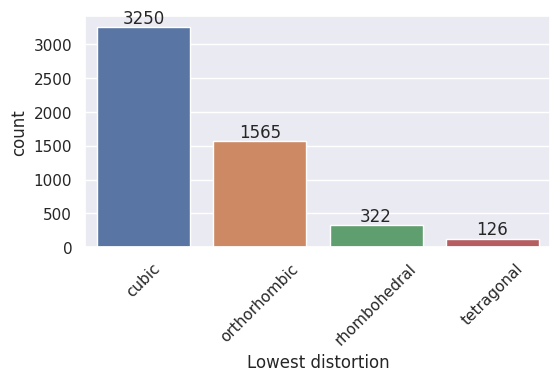

In [6]:
plt.figure(figsize=(6,3))

unbalancedSplot = sns.countplot( x = df_raw['Lowest distortion'] )

plt.bar_label(unbalancedSplot.containers[0])
plt.xticks(rotation=45)
plt.show()

- Pregunta 2

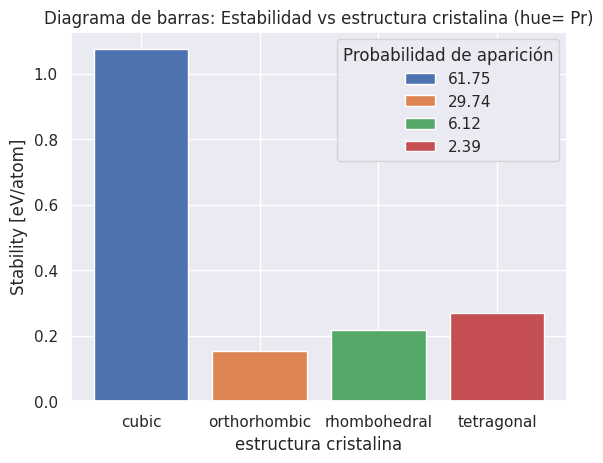

In [7]:
colors = ['g', 'y', 'b', 'r']
cont = 0

proba = []
fig, ax = plt.subplots()
for structure in df_raw['Lowest distortion'].unique():
    
    filterS = df_raw['Lowest distortion'] == structure
    structure_pd = df_raw['Stability [eV/atom]'][filterS]
    prom_stucture = structure_pd.sum()/len(structure_pd)

    proba.append(round((len(structure_pd)/len(df_raw)) * (100), 2) )

    ax.bar(
        structure,
        prom_stucture,
        label=proba[cont]
        )
    cont +=1
plt.legend(title='Probabilidad de aparición')
plt.xlabel("estructura cristalina")
plt.ylabel("Stability [eV/atom]")
plt.title("Diagrama de barras: Estabilidad vs estructura cristalina (hue= Pr)")

plt.show()

- pregunta 3 

In [8]:
q_filter = (df_raw['Lowest distortion'] == 'tetragonal');

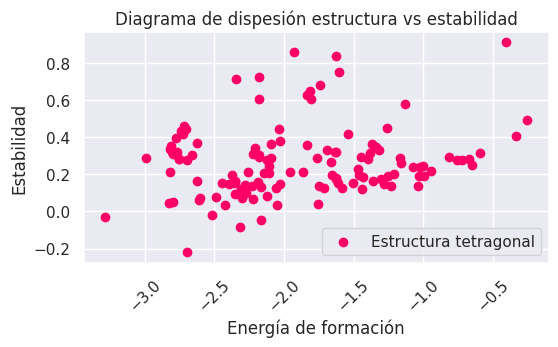

In [9]:
plt.figure(figsize=(6,3))
plt.scatter(df_raw[q_filter]['Formation energy [eV/atom]'], 
    df_raw[q_filter]['Stability [eV/atom]'], color = '#ff0066'
    ,  label= 'Estructura tetragonal')

plt.xlabel("Energía de formación")
plt.ylabel("Estabilidad")
plt.title("Diagrama de dispesión estructura vs estabilidad")
plt.legend(loc = 0, scatterpoints = 1)

plt.xticks(rotation=45)
plt.show()

- Pregunta 4

In [10]:
mean_bGap = df_raw.groupby("A")["Band gap [eV]"].mean().sort_values(ascending=True)

<AxesSubplot: title={'center': 'Mean Band gap vs elements (top 10, ascending)'}, xlabel='Elemento', ylabel='Mean band gap [eV]'>

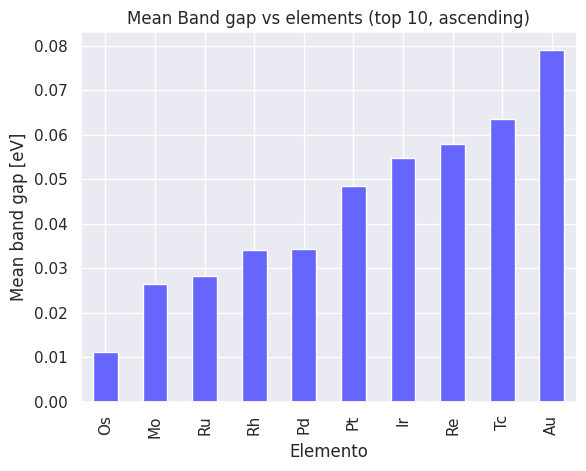

In [11]:
mean_bGap[:10].plot(kind="bar", xlabel = "Elemento", ylabel="Mean band gap [eV]", title = "Mean Band gap vs elements (top 10, ascending)", color= '#6666ff')

- Pregunta 5

In [12]:
df_raw['Lowest distortion'].unique()

array(['cubic', 'orthorhombic', 'rhombohedral', 'tetragonal'],
      dtype=object)

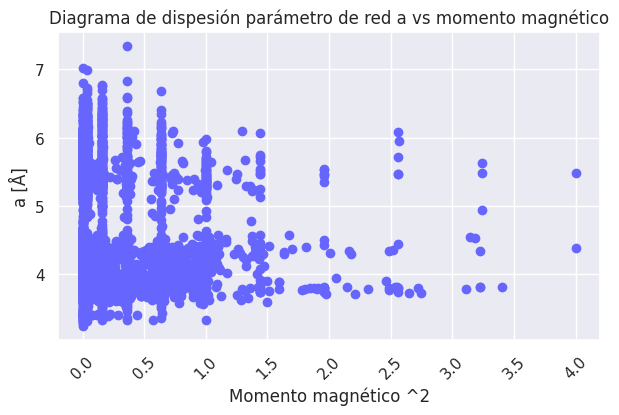

In [13]:
plt.figure(figsize=(7,4))
plt.scatter(df_raw['Magnetic moment (^2[mu_B])'], df_raw['a [ang]'], color = '#6666ff')

plt.xlabel("Momento magnético ^2")
plt.ylabel("a [Å]")
plt.title("Diagrama de dispesión parámetro de red a vs momento magnético")

plt.xticks(rotation=45)
plt.show()

- Pregunta 6

In [14]:
# p = sns.jointplot(data = df_raw, x = 'Magnetic moment (^2[mu_B])', y = 'Formation energy [eV/atom]', hue = 'Lowest distortion')
# p.fig.suptitle('Age vs Charges',y = 1.0)
# plt.show()

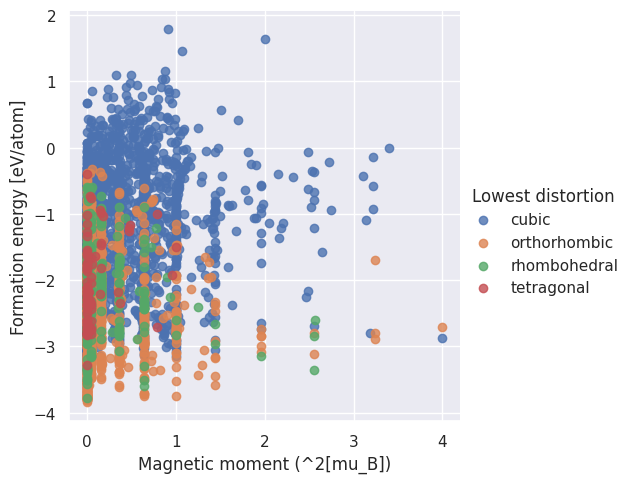

In [15]:
sns.lmplot(x = 'Magnetic moment (^2[mu_B])', y = 'Formation energy [eV/atom]', 
hue = 'Lowest distortion', data=df_raw, fit_reg= False);

- pregunta 7

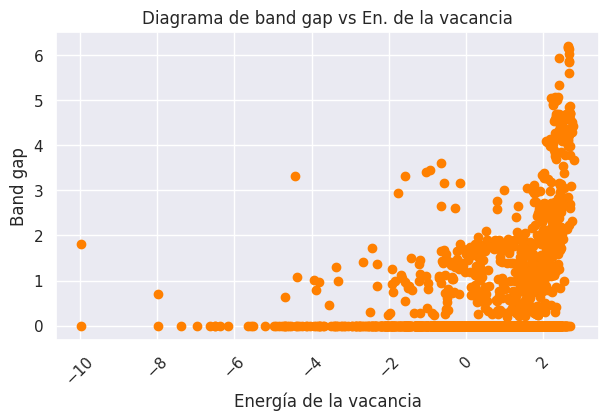

In [16]:
plt.figure(figsize=(7,4))
plt.scatter(df_raw['Vacancy energy (log[eV/O atom])'], df_raw['Band gap [eV]'], color = '#FF8000')

plt.xlabel("Energía de la vacancia")
plt.ylabel("Band gap")
plt.title("Diagrama de band gap vs En. de la vacancia")

plt.xticks(rotation=45)
plt.show()

- pregunta 8

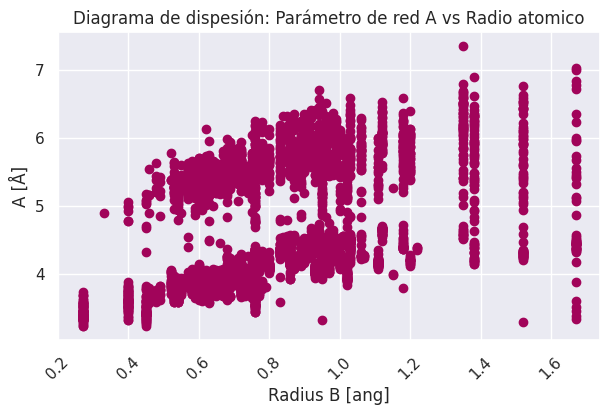

In [17]:
plt.figure(figsize=(7,4))
plt.scatter(df_raw['Radius B [ang]'], df_raw['a [ang]'], color = '#A1045A')

plt.xlabel("Radius B [ang]")
plt.ylabel("A [Å]")
plt.title("Diagrama de dispesión: Parámetro de red A vs Radio atomico")

plt.xticks(rotation=45)
plt.show()

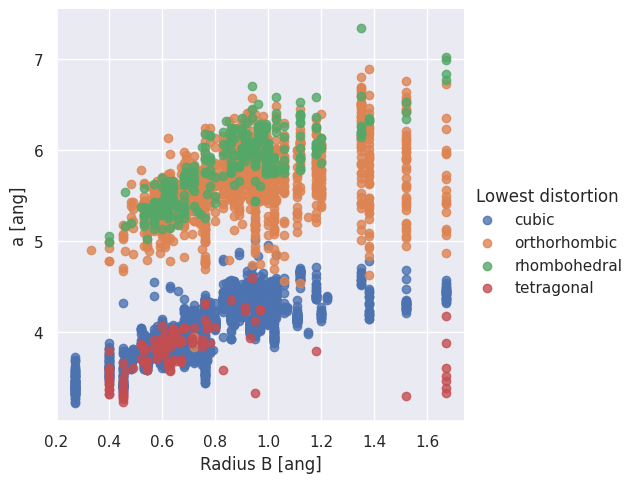

In [18]:
sns.lmplot(x = 'Radius B [ang]', y = 'a [ang]', 
hue = 'Lowest distortion', data=df_raw, fit_reg= False);

- pregunta 9

In [19]:
#elems = ['Ho','Pr', 'Tb', 'Y']
elems = ['Al',  'Ga', 'Zn']

/tmp/ipykernel_3286/85055190.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


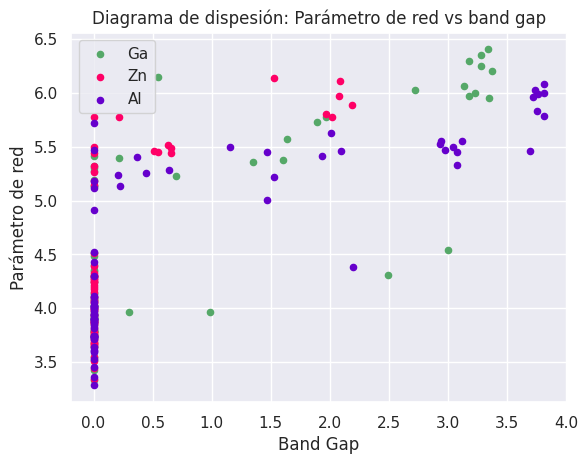

In [20]:
colors = ['g', '#ff0066', '#6600cc','#66ccff', 'y', 'y', '#000', 'b', '#00ff00', '#66ccff']
cont = 0
fig, ax = plt.subplots()

for structure in set(elems):
    #r = lambda: random.randint(0,255) #colores random
    ax.scatter(
        df_raw['Band gap [eV]'][df_raw['A'] ==structure],
        df_raw['a [ang]'][df_raw['A'] ==structure],
        s = 20,
        #c = '#%02X%02X%02X' % (r(),r(),r()),
        c = colors[cont],
        cmap='coolwarm',
        label = structure)
    cont += 1
    
plt.legend()
plt.xlabel("Band Gap")
plt.ylabel("Parámetro de red")
plt.title("Diagrama de dispesión: Parámetro de red vs band gap")

plt.show()


- pregunta 10

In [21]:
elems = ['Al','Sc','Au','B']

/tmp/ipykernel_3286/3432711221.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


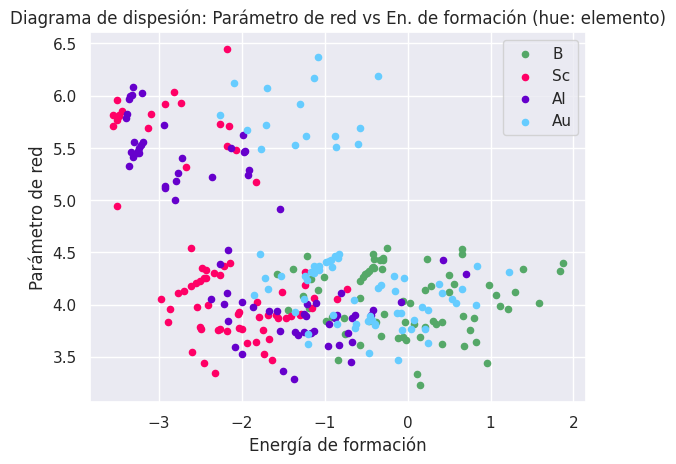

In [22]:
colors = ['g', '#ff0066', '#6600cc','#66ccff', '#FF8000', 'y', '#000', 'b', '#00ff00', '#66ccff']
cont = 0
fig, ax = plt.subplots()

for structure in set(elems):
    #r = lambda: random.randint(0,255) #colores random
    ax.scatter(
        df_raw['Formation energy [eV/atom]'][df_raw['A'] ==structure],
        df_raw['a [ang]'][df_raw['A'] ==structure],
        s = 20,
        #c = '#%02X%02X%02X' % (r(),r(),r()),
        c = colors[cont],
        cmap='coolwarm',
        label = structure)
    cont += 1
    
plt.legend()
plt.xlabel("Energía de formación")
plt.ylabel("Parámetro de red")
plt.title("Diagrama de dispesión: Parámetro de red vs En. de formación (hue: elemento)")

plt.show()


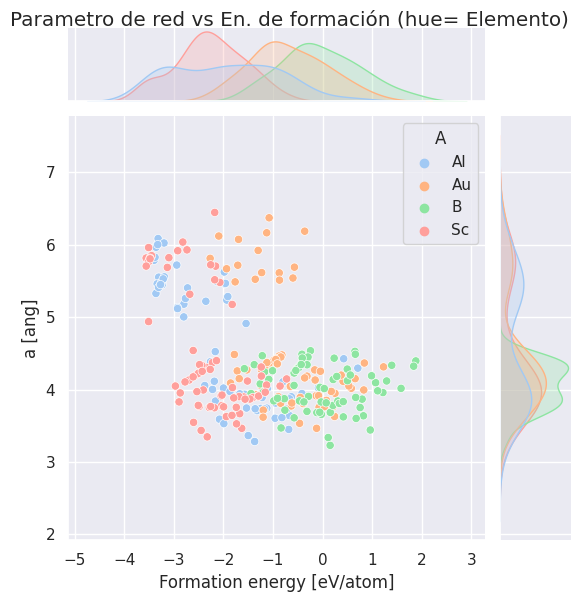

In [23]:
elems = ['Al','Sc','Au','B']
filterE = df_raw['A'].isin(elems)

p = sns.jointplot(data = df_raw[filterE], x = 'Formation energy [eV/atom]', y = 'a [ang]', hue = 'A', palette='pastel')
p.fig.suptitle('Parametro de red vs En. de formación (hue= Elemento)',y = 1.0)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a7ebb3ed-5c94-423a-a3b7-e9cd0209ff98' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>